In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
import pandas as pd
import numpy as np

In [3]:
ped_df = pd.read_csv("pheno.ped", sep='\t')

In [4]:
len(ped_df)

195

In [5]:
ped_df.head()

,familyId,personId,dadId,momId,sex,status,role
0,f1,f1.dad,0,0,1,1,dad
1,f1,f1.mom,0,0,2,1,mom
2,f1,f1.s1,f1.dad,f1.mom,2,1,sib
3,f1,f1.p1,f1.dad,f1.mom,1,2,prb
4,f1,f1.s2,f1.dad,f1.mom,1,2,sib


## Age at assesment

In [6]:
40*12

480

In [7]:
5*12

60

In [8]:
12*12

144

In [9]:
3*12

36

In [10]:
i1_age = pd.Series(np.random.normal(480, 60, len(ped_df)), index=ped_df.index)

In [11]:
index = (ped_df.role == 'prb') | (ped_df.role == 'sib')

In [12]:
i1_age[index] = np.random.normal(144, 36, len(ped_df[index]))

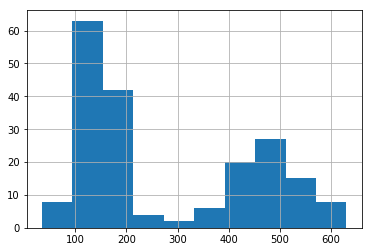

In [13]:
i1_age.hist()

In [14]:
i1_age.min()

35.09525243021298

In [15]:
i1_age.max()

630.0629780668842

In [16]:
603/12

50.25

## IQ

In [17]:
i1_iq = pd.Series(np.random.normal(100, 30, len(ped_df)), index=ped_df.index)

In [18]:
index = ped_df.status == 2

In [19]:
i1_iq[index] = np.random.normal(70, 40, len(ped_df[index]))

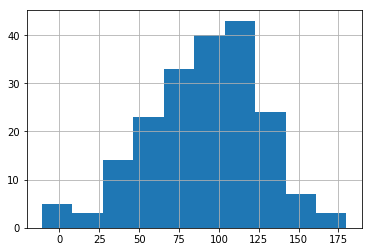

In [20]:
i1_iq.hist()

## Other measures

In [21]:
i1_m1 = pd.Series(np.random.normal(80,20, len(ped_df)), ped_df.index)

In [22]:
i1_m1.head()

0    47.731615
1    60.335132
2    47.457451
3    90.719028
4    88.616888
dtype: float64

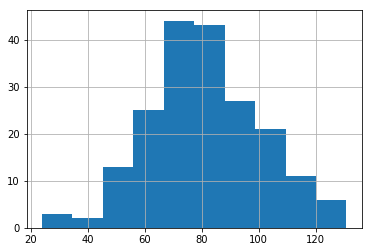

In [23]:
i1_m1.hist()

In [24]:
i1_m2 = pd.Series(np.random.normal(40,10, len(ped_df)), ped_df.index)

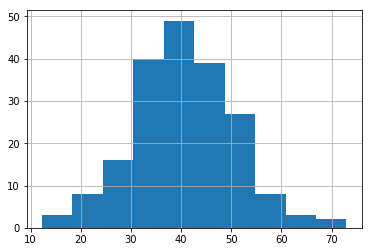

In [25]:
i1_m2.hist()

In [26]:
i1_m3 = pd.Series(np.random.normal(80,20, len(ped_df)), ped_df.index)

In [27]:
index = ped_df.status==2
len(index)

195

In [28]:
len(ped_df[index])

66

In [29]:
i1_m3[index] = np.random.normal(40, 5, len(ped_df[index]))

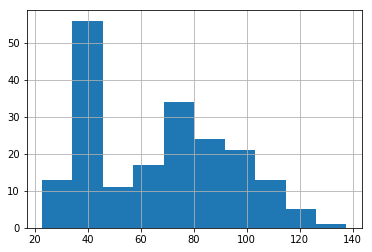

In [30]:
i1_m3.hist()

In [31]:
i1_m4 = pd.Series(np.random.poisson(2, len(ped_df)), index=ped_df.index)

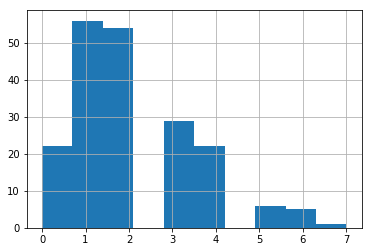

In [32]:
i1_m4.hist()

In [33]:
i1_m4 = pd.Series(np.random.poisson(4, len(ped_df)), index=ped_df.index)
i1_m4[index] = np.random.poisson(1,len(ped_df[index]))

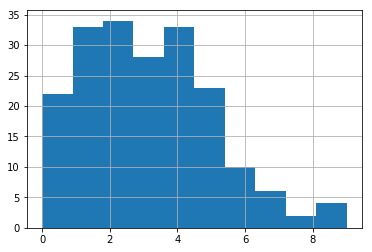

In [34]:
i1_m4.hist()

## Full instrument

In [35]:
i1_df = pd.DataFrame(index=ped_df.index)

In [36]:
i1_df['personId'] = ped_df['personId']

In [37]:
i1_df['age'] = i1_age
i1_df['iq'] = i1_iq
i1_df['m1'] = i1_m1
i1_df['m2'] = i1_m2
i1_df['m3'] = i1_m3
i1_df['m4'] = i1_m4

In [38]:
i1_df.head()

,personId,age,iq,m1,m2,m3,m4
0,f1.dad,482.649720,123.957601,47.731615,35.840138,90.447960,2
1,f1.mom,460.397890,118.252323,60.335132,44.409464,73.222281,6
2,f1.s1,112.692105,136.948771,47.457451,48.667856,88.790009,3
3,f1.p1,150.502270,87.745006,90.719028,47.887456,32.672751,1
4,f1.s2,231.156085,71.621909,88.616888,30.867614,36.843871,0


In [39]:
i1_df.to_csv("instruments/i1.csv", index=False)